# Welcome to programming models in brian2!

brian2 is a python library that allows computational neural modeling in python. To import all of the tools we're going to use, run the following:

In [1]:
from brian2 import *
%matplotlib inline

The first line imports *all* of the necessary components to run neural simulations on this machine. 

### **This is different from the standard "import library" call.** 

With this command, python loads all of the materials from brian2 as they are named in brian2 -- that way you don't have to do the standard "library.function" call of "function" later.

The second line tells our graphs to plot inline and will become useful later.

For example, the brian2 libary imported this way loads unit types:

In [3]:
20*volt

20. * volt

These values even relate to each other as they would in actual physics equations. For example, recall the relationship between voltage, current, and resistance:

$V = I * R$

Here, you can run actual computations using these units:

In [5]:
3*amp * 2*ohm

6. * volt

These mathematical operations are also dependent on the scale of the units in use:

In [10]:
3*mamp * 2*mohm

6. * uvolt

So, if we want to calculate the current moving across a neuron membrane at rest, we can calculate that by dividing the neuron's resting voltage (e.g. -70 mV) by its membrane resistance (e.g. 10 MOhm)

In [57]:
(-70*mV)/(10*Mohm)

-7. * namp

All of this is useful because it lets us write and run equations describing the behavior of our modeled neurons using real values for our physical paramaters. So in the equation we've been exploring thus far: 
\begin{equation}
\frac{dv}{dt} = \bigg(\frac{1}{C_m}\bigg)\bigg(\frac{v_0-v}{R_m} + I\bigg)
\end{equation}

we can define real values of the membrane capacitance, membrane resistance, and reset (or base resting) voltage of the membrane. If we tailor these values to observations from real animals, we can tune this model to behave similarly to any particular species.

For now, let's define these variables by commonly used measurements.

In [61]:
Cap_mem = 0.002*uF
v_0 = -70*mV 
Resist_mem = 10*Mohm

To pass our neuron model equation to brian2, we need to define it inside of a string. The easiest way to do this is as a multiline string using three single ' marks on separate lines above and below the equation.

In [104]:
neuron_equation = '''
dv/dt = (1/Cap_mem) * (((v_0 - v)/Resist_mem) + I_var) : volt (unless refractory)
'''

In addition to an inline version of our equation referencing our defined constants, we also need to add " : volt (unless refractory)" -- this is a sign to brian2 to: 
    1. solve for voltage 
    2. solve for all times when the neuron is not in a refractory period

### Next, let's set up a longer block for running a simple neural simulation.
To do so, we'll:
1. define our variable current value (I_var)
2. start our simulation scope
3. define a neuron group containing our only simulated neuron referencing all equations and variables necessary to run
4. defne our neuron's starting voltage
5. start a monitor of this neuron's voltage
6. run the equation for a set period of time
7. plot our monitor of the neuron's voltage

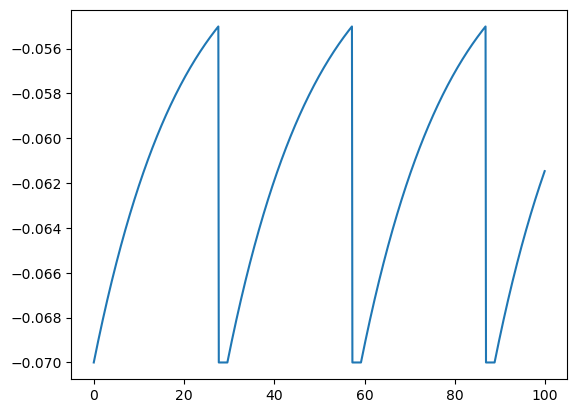

In [143]:
I_var = 2*namp

start_scope()

neuron_number = 1
threshold_voltage = 'v > -55*mV'
reset_v = 'v = v_0'
refractory_period = 2*ms
solution_method = 'heun'
sim_neuron = NeuronGroup(neuron_number, neuron_equation, threshold = threshold_voltage, 
                         reset = reset_v, refractory = refractory_period, method = 'heun')
sim_neuron.v = v_0

voltage_mon = StateMonitor(sim_neuron, 'v', record=True)

run(100*ms)

plot(voltage_mon.t/ms, voltage_mon.v[0])

### Now, let's try adding a spike monitor to the same code block to keep track of when action potentials occur

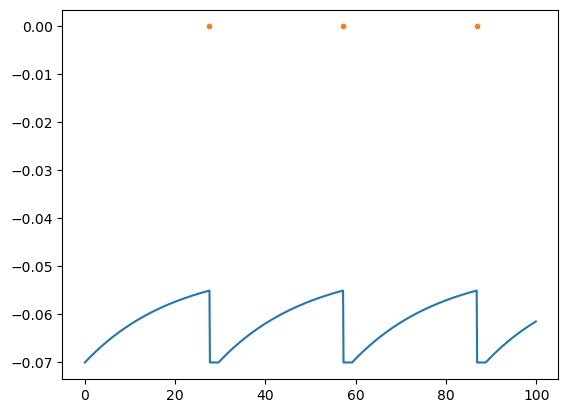

In [121]:
I_var = 2*namp

start_scope()

neuron_number = 1
threshold_voltage = 'v > -55*mV'
reset_v = 'v = v_0'
refractory_period = 2*ms
solution_method = 'heun'
sim_neuron = NeuronGroup(neuron_number, neuron_equation, threshold = threshold_voltage, 
                         reset = reset_v, refractory = refractory_period, method = 'heun')
sim_neuron.v = v_0

voltage_mon = StateMonitor(sim_neuron, 'v', record=True)
spike_mon = SpikeMonitor(sim_neuron, record=True)

run(100*ms)

plot(voltage_mon.t/ms, voltage_mon.v[0])
plot(spike_mon.t/ms, spike_mon.i, '.')

### For a final edit of this basic simulation form, let's make the graph a little prettier.

To do that, we'll make the graphing function input lines at the action potential and define and label the scales of the x and y axes.

Text(0, 0.5, 'v')

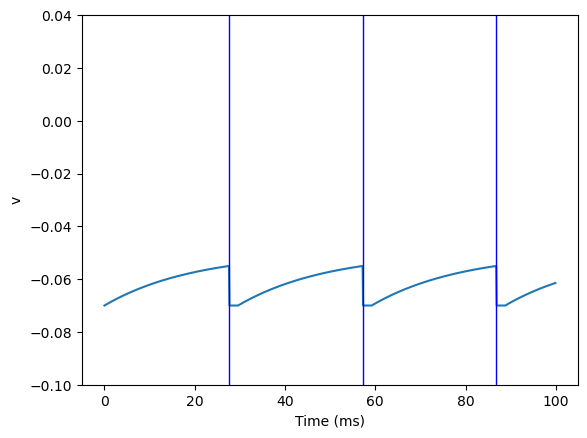

In [145]:
I_var = 2*namp

start_scope()

neuron_number = 1
threshold_voltage = 'v > -55*mV'
reset_v = 'v = v_0'
refractory_period = 2*ms
solution_method = 'heun'
sim_neuron = NeuronGroup(neuron_number, neuron_equation, threshold = threshold_voltage, 
                         reset = reset_v, refractory = refractory_period, method = 'heun')
sim_neuron.v = v_0

voltage_mon = StateMonitor(sim_neuron, 'v', record=True)
spike_mon = SpikeMonitor(sim_neuron, record=True)

run(100*ms)

plot(voltage_mon.t/ms, voltage_mon.v[0])
for t in spike_mon.t:
    axvline(t/ms, c='b', lw=1)
ylim(-0.1, 0.04)
xlabel('Time (ms)')
ylabel('v')

## Now we have a basic code block that can simulate a single neuron. Now **y'all** should modify features of the neuron to see how that changes its performance.
### At this point in the code, do the following:
1. Copy the cell above and move it below this one.
2. Change the current value to higher and lower values -- how does this change performance?
3. Change the threshold to higher and lower values -- how does this change performance?
4. Modify the refractory period -- how does this affect performance? Is this indicative of relative or absolute refractory period?